<p><font size="6"><b>Pandas: Reshaping data with `stack` and `unstack`</b></font></p>

> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2016*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

## Pivoting data

Small subsample of the titanic dataset:

In [53]:
df = pd.DataFrame({'Fare': [7.25, 71.2833, 51.8625, 30.0708, 7.8542, 13.0],
                   'Pclass': [3, 1, 1, 2, 3, 2],
                   'Sex': ['male', 'female', 'male', 'female', 'female', 'male'],
                   'Survived': [0, 1, 0, 1, 0, 1]})

In [54]:
df

,Fare,Pclass,Sex,Survived
0,7.2500,3,male,0
1,71.2833,1,female,1
2,51.8625,1,male,0
3,30.0708,2,female,1
4,7.8542,3,female,0
5,13.0000,2,male,1


In [29]:
df.pivot(index='Pclass', columns='Sex', values='Fare')

Sex,female,male
Pclass,,
1,71.2833,51.8625
2,30.0708,13.0000
3,7.8542,7.2500


In [31]:
#df.pivot(index='Pclass', columns='Sex')

In [33]:
#df.pivot(columns='Sex')

In [34]:
df.pivot(index='Pclass', columns='Sex', values='Survived')

Sex,female,male
Pclass,,
1,1,0
2,1,1
3,0,0


But let's now use the full dataset:

In [35]:
df = pd.read_csv("../data/titanic.csv")

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


And try the same pivot:

In [37]:
try:
    df.pivot(index='Sex', columns='Pclass', values='Fare')
except Exception as e:
    print("Exception!", e)

Exception! Index contains duplicate entries, cannot reshape


This does not work, because we would end up with multiple values for one cell of the resulting frame. Enter `pivot_table`

## Pivot tables - aggregating while pivoting

In [1]:
df = pd.read_csv("../data/titanic.csv")

In [39]:
df.pivot_table(index='Sex', columns='Pclass', values='Fare')

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


By default it takes the mean of all values that would end up into one cell. But, we can also specify another method using the `aggfunc` keyword:

In [41]:
df.pivot_table(index='Sex', columns='Pclass', values='Fare', aggfunc='max')

Pclass,1,2,3
Sex,,,
female,512.3292,65.0,69.55
male,512.3292,73.5,69.55


In [43]:
df.pivot_table(index='Sex', columns='Pclass', values='Fare', aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


Exercise: make a pivot table with the survival rates for Pclass vs Sex.

In [49]:
df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


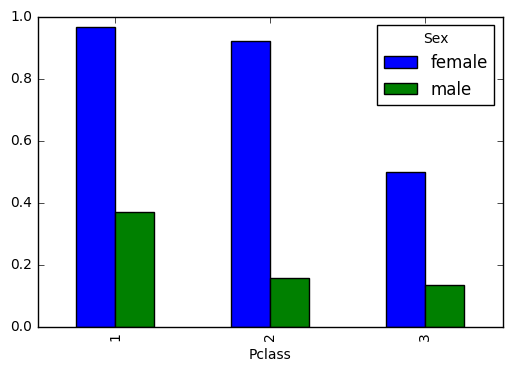

In [50]:
df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean').plot(kind='bar')

## Reshaping with `stack` and `unstack`

The docs say:

> Pivot a level of the (possibly hierarchical) column labels, returning a
DataFrame (or Series in the case of an object with a single level of
column labels) having a hierarchical index with a new inner-most level
of row labels.

<img src="../img/stack.png" width=70%>

In [9]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


To use `stack`/`unstack`, we need the values we want to shift from rows to columns or the other way around as the index:

In [10]:
df = df.set_index(['A', 'B'])
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [11]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [12]:
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


### Mimic pivot table 

using combination of groupby and stack/unstack

In [56]:
df = pd.read_csv("../data/titanic.csv")

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


Exercise

In [62]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


## More exercises: use the reshaping methods with the movie data

In [65]:
cast = pd.read_csv('../data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [66]:
titles = pd.read_csv('../data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of actor roles each year and the number of actress roles each year over the history of film.
</div>

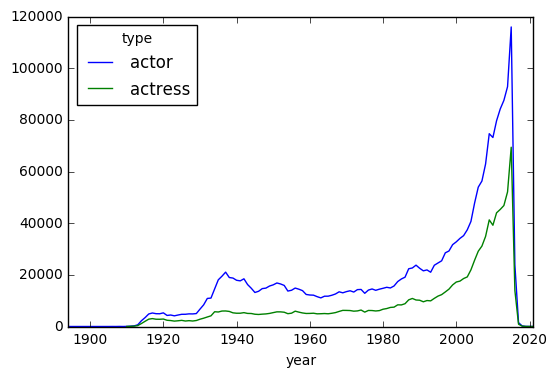

In [68]:
grouped = cast.groupby(['year', 'type']).size()
table = grouped.unstack('type')
table.plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.
</div>

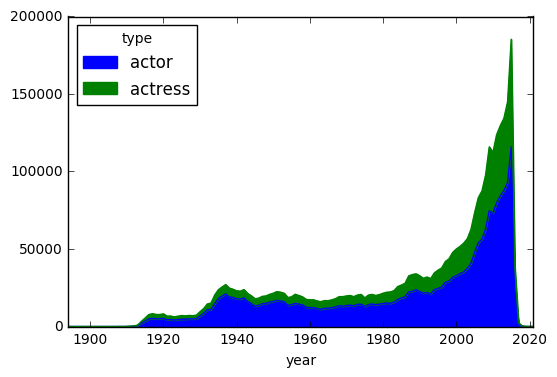

In [69]:
grouped = cast.groupby(['year', 'type']).size()
table = grouped.unstack('type')
table.plot(kind='area')

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.
</div>

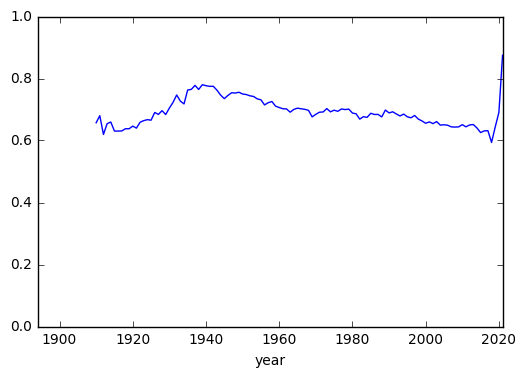

In [73]:
grouped = cast.groupby(['year', 'type']).size()
table = grouped.unstack('type')
(table['actor'] / (table['actor'] + table['actress'])).plot(ylim=[0,1])

<div class="alert alert-success">
    <b>EXERCISE</b>: Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?
</div>

In [40]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [41]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
12
